In [12]:
# (a) Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
# (b) Upload / access the dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X_train = data.drop("Class", axis=1).values
y_train = data["Class"].values

X_test = data.drop('Class',axis = 1).values
y_test = data['Class'].values
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [15]:
# (c) Encoder – converts input into latent representation
input_dim = X.shape[1]
autoencoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
]) 

In [16]:
# (e) Compile model with optimizer, loss, and metrics
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train only on normal transactions
X_train = X[y == 0]
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, verbose=1)

Epoch 1/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8213 - mae: 0.5778
Epoch 2/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7666 - mae: 0.5437
Epoch 3/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7568 - mae: 0.5361
Epoch 4/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7504 - mae: 0.5314
Epoch 5/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7429 - mae: 0.5257
Epoch 6/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7390 - mae: 0.5224
Epoch 7/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7342 - mae: 0.5187
Epoch 8/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7305 - mae: 0.5164
Epoch 9/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7289 - mae: 0.5150
Epoch 10/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7272 - mae: 0.5138


In [17]:
history.history.keys()

dict_keys(['loss', 'mae'])

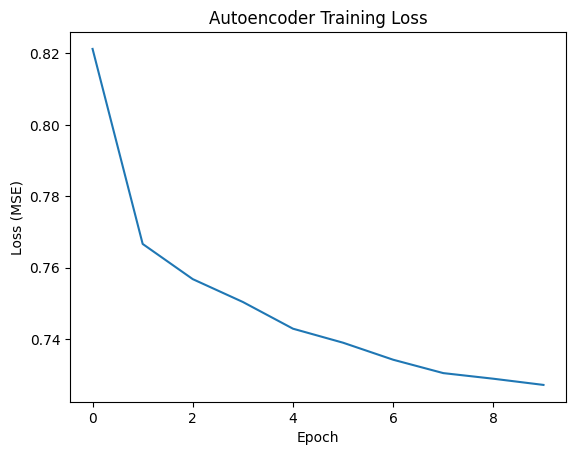

In [18]:
# Visualization – training loss over epochs
plt.plot(history.history['loss'])
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


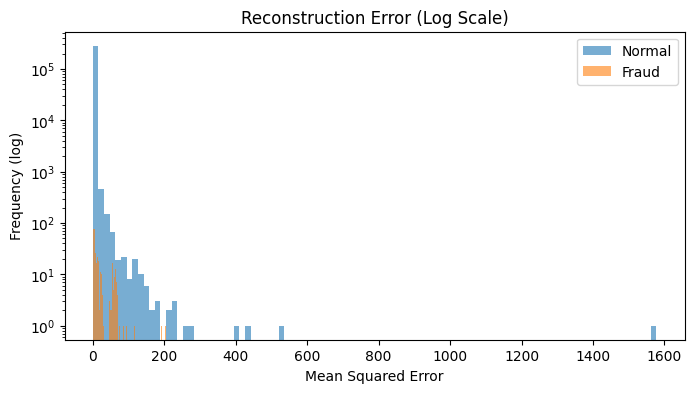

In [19]:
# Visualization – compare reconstruction error between Normal and Fraud
reconstructed = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructed, 2), axis=1)

plt.figure(figsize=(8,4))
plt.hist(mse[y == 0], bins=100, alpha=0.6, label='Normal')
plt.hist(mse[y == 1], bins=100, alpha=0.6, label='Fraud')
plt.yscale('log')
plt.title('Reconstruction Error (Log Scale)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency (log)')
plt.legend()
plt.show()